In [1]:
import os
import cv2
import torch
# Đường dẫn gốc chứa các thư mục con
base_folder = "D:/CS114.O21.KHCL/Project/Data"

In [30]:
import os
import shutil
import pandas as pd

# Đường dẫn tới các file CSV và folder Labels-raw
train_csv_path = 'D:/CS114.O21.KHCL/Project/csv/MotocycleDataset-Splits-1-Train.csv'
val_csv_path = 'D:/CS114.O21.KHCL/Project/csv/MotocycleDataset-Splits-1-Test.csv'
labels_raw_folder = 'D:/CS114.O21.KHCL/Project/Labels-change'
output_train_folder = 'D:/CS114.O21.KHCL/Project/Labels/train'
output_val_folder = 'D:/CS114.O21.KHCL/Project/Labels/val'

# Đọc các file CSV
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)

# Lấy danh sách tên file từ cột đầu tiên của các file CSV
train_files = train_df.iloc[:, 0].apply(lambda x: os.path.splitext(os.path.basename(x))[0]).tolist()
val_files = val_df.iloc[:, 0].apply(lambda x: os.path.splitext(os.path.basename(x))[0]).tolist()

# Hàm để sao chép file vào thư mục tương ứng
def copy_files(files_list, src_folder, dest_folder):
    for category in ["Others", "Honda", "Suzuki", "Yamaha", "VinFast"]:
        category_folder = os.path.join(src_folder, category)
        for file_name in files_list:
            src_file = os.path.join(category_folder, file_name + '.txt')
            if os.path.exists(src_file):
                dest_category_folder = os.path.join(dest_folder, category)
                os.makedirs(dest_category_folder, exist_ok=True)
                shutil.copy(src_file, dest_category_folder)

# Sao chép các file vào thư mục train và val tương ứng
copy_files(train_files, labels_raw_folder, output_train_folder)
copy_files(val_files, labels_raw_folder, output_val_folder)

print("Đã hoàn thành việc sao chép file label thành train và val.")


Đã hoàn thành việc sao chép file label thành train và val.


In [ ]:
import os
import shutil
import pandas as pd

# Đường dẫn tới các file CSV và folder Labels-raw
train_csv_path = 'D:/CS114.O21.KHCL/Project/csv/MotocycleDataset-Splits-1-Train.csv'
val_csv_path = 'D:/CS114.O21.KHCL/Project/csv/MotocycleDataset-Splits-1-Test.csv'
labels_raw_folder = 'D:/CS114.O21.KHCL/Project/Labels-change'
public_folder = '/content/drive/MyDrive/Public'

# Đọc các file CSV
train_df = pd.read_csv(train_csv_path)
val_df = pd.read_csv(val_csv_path)

def move_image_files(files_list, src_folder, dest_folder):
    for file_name in files_list:
        for category in ["Others", "Honda", "Suzuki", "Yamaha", "VinFast"]:
            for ext in ['.jpg', '.png', '.jpeg', '.bmp']:  # Kiểm tra các phần mở rộng tệp khác nhau
                src_file = os.path.join(src_folder, category, file_name + ext)
                if os.path.exists(src_file):
                    dest_category_folder = os.path.join(dest_folder, category)
                    os.makedirs(dest_category_folder, exist_ok=True)
                    shutil.move(src_file, dest_category_folder)
                    break  # Khi đã tìm thấy và di chuyển tệp, thoát khỏi vòng lặp mở rộng

# Di chuyển các tệp ảnh vào thư mục tương ứng
move_image_files(train_files, public_folder, new_images_train_folder)
move_image_files(val_files, public_folder, new_images_val_folder)

print("Đã di chuyển các tệp ảnh thành công.")


In [35]:
import os

# Đường dẫn tới các folder images và labels trong data_train
data_train_images_folder = 'D:/CS114.O21.KHCL/Project/data_train/train/images'
data_test_images_folder = 'D:/CS114.O21.KHCL/Project/data_train/val/images'
data_train_labels_folder = 'D:/CS114.O21.KHCL/Project/data_train/train/labels'
data_test_labels_folder = 'D:/CS114.O21.KHCL/Project/data_train/val/labels'

# Hàm đếm số lượng file trong từng thư mục con
def count_files_in_folder(folder_path, file_extensions=None):
    file_counts = {}
    for category in ["Others", "Honda", "Suzuki", "Yamaha", "VinFast"]:
        category_folder = os.path.join(folder_path, category)
        if os.path.exists(category_folder) and os.path.isdir(category_folder):
            if file_extensions:
                file_count = len([f for f in os.listdir(category_folder) if os.path.isfile(os.path.join(category_folder, f)) and os.path.splitext(f)[1].lower() in file_extensions])
            else:
                file_count = len([f for f in os.listdir(category_folder) if os.path.isfile(os.path.join(category_folder, f))])
            file_counts[category] = file_count
        else:
            file_counts[category] = 0
    return file_counts

# Đếm số lượng file ảnh trong từng thư mục con của data_train/images
image_file_counts_train = count_files_in_folder(data_train_images_folder, file_extensions=['.jpg', '.png', '.jpeg'])
# Đếm số lượng file ảnh trong từng thư mục con của data_train/images
image_file_counts_test = count_files_in_folder(data_test_images_folder, file_extensions=['.jpg', '.png', '.jpeg'])

# Đếm số lượng file nhãn trong từng thư mục con của data_train/labels
label_file_counts_train = count_files_in_folder(data_train_labels_folder)
# Đếm số lượng file nhãn trong từng thư mục con của data_train/labels
label_file_counts_test = count_files_in_folder(data_test_labels_folder)

# In ra số lượng file ảnh
print("Số lượng file ảnh trong thư mục train images:")
for category, count in image_file_counts_train.items():
    print(f"  {category}: {count}")
    
    # In ra số lượng file ảnh
print("Số lượng file ảnh trong thư mục test images:")
for category, count in image_file_counts_test.items():
    print(f"  {category}: {count}")

# In ra số lượng file nhãn
print("Số lượng file nhãn trong thư mục train labels:")
for category, count in label_file_counts_train.items():
    print(f"  {category}: {count}")
    
# In ra số lượng file nhãn
print("Số lượng file nhãn trong thư mục test labels:")
for category, count in label_file_counts_test.items():
    print(f"  {category}: {count}")


Số lượng file ảnh trong thư mục train images:
  Others: 4137
  Honda: 7008
  Suzuki: 4832
  Yamaha: 5649
  VinFast: 2918
Số lượng file ảnh trong thư mục test images:
  Others: 1024
  Honda: 1750
  Suzuki: 1216
  Yamaha: 1431
  VinFast: 732
Số lượng file nhãn trong thư mục train labels:
  Others: 4137
  Honda: 7008
  Suzuki: 4831
  Yamaha: 5655
  VinFast: 2921
Số lượng file nhãn trong thư mục test labels:
  Others: 1024
  Honda: 1752
  Suzuki: 1216
  Yamaha: 1434
  VinFast: 738


In [33]:
import os

# Đường dẫn tới các folder images và labels trong data_train
data_train_images_folder = 'D:/CS114.O21.KHCL/Project/data_train/train/images'
data_test_images_folder = 'D:/CS114.O21.KHCL/Project/data_train/val/images'
data_train_labels_folder = 'D:/CS114.O21.KHCL/Project/data_train/train/labels'
data_test_labels_folder = 'D:/CS114.O21.KHCL/Project/data_train/val/labels'

# Hàm lấy danh sách file trong thư mục
def get_files_list(folder_path, file_extensions=None):
    files_list = []
    for category in ["Others", "Honda", "Suzuki", "Yamaha", "VinFast"]:
        category_folder = os.path.join(folder_path, category)
        if os.path.exists(category_folder) and os.path.isdir(category_folder):
            if file_extensions:
                category_files = [os.path.splitext(f)[0] for f in os.listdir(category_folder) if os.path.isfile(os.path.join(category_folder, f)) and os.path.splitext(f)[1].lower() in file_extensions]
            else:
                category_files = [os.path.splitext(f)[0] for f in os.listdir(category_folder) if os.path.isfile(os.path.join(category_folder, f))]
            files_list.extend(category_files)
    return set(files_list)  # Trả về set để loại bỏ các phần tử trùng lặp

# Lấy danh sách các file trong các thư mục images và labels của cả train và test
train_images_files = get_files_list(data_train_images_folder, file_extensions=['.jpg', '.png', '.jpeg'])
test_images_files = get_files_list(data_test_images_folder, file_extensions=['.jpg', '.png', '.jpeg'])
train_labels_files = get_files_list(data_train_labels_folder)
test_labels_files = get_files_list(data_test_labels_folder)

# Tìm tập hợp các file có trong cả images và labels của cả train và test
train_files_intersection = train_images_files.intersection(train_labels_files)
test_files_intersection = test_images_files.intersection(test_labels_files)

print(f"Số lượng file chung giữa thư mục train images và train labels: {len(train_files_intersection)}")
print(f"Số lượng file chung giữa thư mục test images và test labels: {len(test_files_intersection)}")


Số lượng file chung giữa thư mục train images và train labels: 24517
Số lượng file chung giữa thư mục test images và test labels: 6151


In [34]:
# Hàm loại bỏ các file không thuộc vào tập hợp file chung
def remove_non_shared_files(folder_path, files_to_keep):
    for category in ["Others", "Honda", "Suzuki", "Yamaha", "VinFast"]:
        category_folder = os.path.join(folder_path, category)
        if os.path.exists(category_folder) and os.path.isdir(category_folder):
            for file_name in os.listdir(category_folder):
                file_path = os.path.join(category_folder, file_name)
                if os.path.isfile(file_path):
                    file_name_without_ext = os.path.splitext(file_name)[0]
                    if file_name_without_ext not in files_to_keep:
                        os.remove(file_path)

# Loại bỏ các file không phải là file chung từ thư mục images của train và test
remove_non_shared_files(data_train_images_folder, train_files_intersection)
remove_non_shared_files(data_test_images_folder, test_files_intersection)

# Loại bỏ các file không phải là file chung từ thư mục labels của train và test
remove_non_shared_files(data_train_labels_folder, train_files_intersection)
remove_non_shared_files(data_test_labels_folder, test_files_intersection)

print("Đã loại bỏ các file không phải là file chung thành công.")

Đã loại bỏ các file không phải là file chung thành công.


In [5]:
import yaml

data = {
    'train': 'D:/CS114.O21.KHCL/Project/Data_train/train',
    'val': 'D:/CS114.O21.KHCL/Project/Data_train/val',
    'names': ['0: Others', '1: Honda', '2: Suzuki', '3: Yamaha', '4: VinFast']
}

yaml_path = 'data.yaml'
with open(yaml_path, 'w') as yaml_file:
    yaml.dump(data, yaml_file, default_flow_style=False)

print("Data processing complete.")


Data processing complete.


In [1]:
from ultralytics import YOLO

yolo = YOLO('yolov8n.pt')
yolo.train(data='D:/CS114.O21.KHCL/Project/data.yaml', epochs=10)
valid_results = yolo.val()
print(valid_results)

New https://pypi.org/project/ultralytics/8.2.48 available  Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.2.41  Python-3.12.2 torch-2.2.2+cpu CPU (AMD Ryzen 7 5800HS with Radeon Graphics)
engine\trainer: task=detect, mode=train, model=D:/CS114.O21.KHCL/Project/yolov9s.pt, data=D:/CS114.O21.KHCL/Project/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, re

train: Scanning D:\CS114.O21.KHCL\Project\Data_train\train\labels\Honda.cache... 24544 images, 0 backgrounds, 6 corrupt: 100%|██████████| 24544/24544 [00:00<?, ?it/s]

train: WARNING  D:\CS114.O21.KHCL\Project\Data_train\train\images\Suzuki\22520003-22520010-22520398-22520630-22520053.suzuki.101.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0681       1.208      1.4675      1.3735]
train: WARNING  D:\CS114.O21.KHCL\Project\Data_train\train\images\Suzuki\22520003-22520010-22520398-22520630-22520053.suzuki.101.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.0681       1.208      1.4675      1.3735]
train: WARNING  D:\CS114.O21.KHCL\Project\Data_train\train\images\Suzuki\22520003-22520010-22520398-22520630-22520053.suzuki.68.jpg: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5652]
train: WARNING  D:\CS114.O21.KHCL\Project\Data_train\train\images\Suzuki\22520003-22520010-22520398-22520630-22520053.suzuki.68.png: ignoring corrupt image/label: non-normalized or out of bounds coordinates [     1.5652]
train: WARNING  D:\CS114.O21.KHCL\Project\


val: Scanning D:\CS114.O21.KHCL\Project\Data_train\val\labels\Honda.cache... 6153 images, 0 backgrounds, 0 corrupt: 100%|██████████| 6153/6153 [00:00<?, ?it/s]

val: WARNING  D:\CS114.O21.KHCL\Project\Data_train\val\images\Honda\22520327.Honda.14.jpg: corrupt JPEG restored and saved
val: WARNING  D:\CS114.O21.KHCL\Project\Data_train\val\images\Honda\22520327.Honda.15.jpg: corrupt JPEG restored and saved
val: WARNING  D:\CS114.O21.KHCL\Project\Data_train\val\images\Honda\22520327.Honda.2.jpg: corrupt JPEG restored and saved
val: WARNING  D:\CS114.O21.KHCL\Project\Data_train\val\images\Honda\22520327.Honda.20.jpg: corrupt JPEG restored and saved
val: WARNING  D:\CS114.O21.KHCL\Project\Data_train\val\images\Honda\22520327.Honda.6.jpg: corrupt JPEG restored and saved
val: WARNING  D:\CS114.O21.KHCL\Project\Data_train\val\images\Others\19522228.Others.4.jpg: corrupt JPEG restored and saved
val: WARNING  D:\CS114.O21.KHCL\Project\Data_train\val\images\Others\22520327.Others.14.jpg: corrupt JPEG restored and saved
val: WARNING  D:\CS114.O21.KHCL\Project\Data_train\val\images\Others\22520327.Others.4.jpg: corrupt JPEG restored and saved
val: WARNING  

Plotting labels to runs\detect\train3\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 


c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


optimizer: AdamW(lr=0.001111, momentum=0.9) with parameter groups 221 weight(decay=0.0), 228 weight(decay=0.0005), 227 bias(decay=0.0)
TensorBoard: model graph visualization added 
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\train3
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/1534 [00:00<?, ?it/s]

c:\Python312\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


image 1/1 D:\CS114.O21.KHCL\Project\test\R.jpg: 544x640 1 1: Honda, 318.0ms
Speed: 4.5ms preprocess, 318.0ms inference, 2.1ms postprocess per image at shape (1, 3, 544, 640)


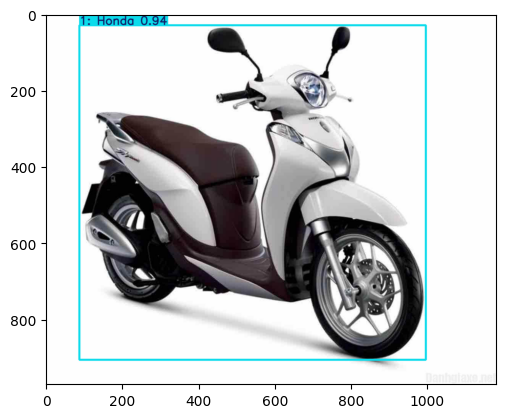

In [2]:
from ultralytics import YOLO
import matplotlib.pyplot as plt
import cv2

# Tải mô hình YOLO đã huấn luyện
yolo = YOLO('D:/CS114.O21.KHCL/Project/runs/detect/train/weights/best.pt')

# Đường dẫn đến hình ảnh bạn muốn dự đoán
image_path = 'D:/CS114.O21.KHCL/Project/test/R.jpg'

# Chạy dự đoán
results = yolo.predict(source=image_path)

# Hiển thị kết quả trực tiếp trong Colab
for result in results:
    annotated_img = result.plot()
    plt.imshow(cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB))
    plt.show()


In [3]:
results[0]

ultralytics.engine.results.Results object with attributes:

boxes: ultralytics.engine.results.Boxes object
keypoints: None
masks: None
names: {0: '0: Others', 1: '1: Honda', 2: '2: Suzuki', 3: '3: Yamaha', 4: '4: VinFast'}
obb: None
orig_img: array([[[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [254, 254, 254],
        [254, 254, 254],
        [254, 254, 254]],

       ...,

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        ...,
        [248, 248, 248],
        [249, 249, 249],
        [252, 252, 252]],

       [[254, 254, 254],
        [254, 254, 254],
        [254, 254, 254],
        .

In [12]:
print(result.boxes.conf) 

tensor([0.9425])


In [13]:
result.boxes.cls

tensor([1.])

In [22]:
for result in results:
    boxes = result.boxes  # Boxes object for bbox outputs
    confs = boxes.data[:,5:] # Confidence and class ID of the detected objects
print(confs)

tensor([[1.]])


In [24]:
confs

tensor([[0.9413, 1.0000]])

In [13]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'person', 1: 'bicycle', 2: 'car', 3: 'motorcycle', 4: 'airplane', 5: 'bus', 6: 'train', 7: 'truck', 8: 'boat', 9: 'traffic light', 10: 'fire hydrant', 11: 'stop sign', 12: 'parking meter', 13: 'bench', 14: 'bird', 15: 'cat', 16: 'dog', 17: 'horse', 18: 'sheep', 19: 'cow', 20: 'elephant', 21: 'bear', 22: 'zebra', 23: 'giraffe', 24: 'backpack', 25: 'umbrella', 26: 'handbag', 27: 'tie', 28: 'suitcase', 29: 'frisbee', 30: 'skis', 31: 'snowboard', 32: 'sports ball', 33: 'kite', 34: 'baseball bat', 35: 'baseball glove', 36: 'skateboard', 37: 'surfboard', 38: 'tennis racket', 39: 'bottle', 40: 'wine glass', 41: 'cup', 42: 'fork', 43: 'knife', 44: 'spoon', 45: 'bowl', 46: 'banana', 47: 'apple', 48: 'sandwich', 49: 'orange', 50: 'broccoli', 51: 'carrot', 52: 'hot dog', 53: 'pizza', 54: 'donut', 55: 'cake', 56: 'chair', 57: 'couch', 58: 'potted p

In [10]:
probs = result.probs

In [12]:
print(probs)

None
